In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import scipy.linalg
import matplotlib.pyplot as plt
import linear_shrinkage
import Util
from os.path import join
from generating_MTP import generate_mat as generate_MTP2
import os

In [57]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [3]:
ret, ret_nonan, univ, tradeidx, dates = Util.load_data()

In [86]:
#gets 1260 days worth of returns for N = 100 stocks
pastRet = Util.get_past_period(5, 1260, 50, univ, tradeidx, ret)
print(pastRet.shape)

(1260, 50)


In [87]:
pca = PCA(n_components = 5) #keep the first 5 principal components
pca.fit(X = pastRet)
print("Variance explained by components")
print(pca.explained_variance_ratio_)
factors = pca.components_
print("Shape of factors")
print(factors.shape)

Variance explained by components
[0.31285976 0.05475711 0.04557419 0.03930924 0.03425269]
Shape of factors
(5, 50)


In [88]:
#constructs factor matrix for each day 
fac_mat = []
for t in range(1260):
    fac_vec = factors.dot(pastRet[t])
    fac_mat.append(fac_vec)
fac_mat = np.array(fac_mat)
print("Factor matrix shape:", fac_mat.shape)

Factor matrix shape: (1260, 5)


In [96]:
#constructs residual matrix after getting betas for each asset
B = []
res_mat = []
for i in range(50):
    lm = LinearRegression()
    asset = pastRet[:, i]
    lm.fit(X = fac_mat, y = asset)
    beta_i = lm.coef_
    B.append(beta_i)
    pred = lm.predict(X = fac_mat)
    res = asset - pred
    res_mat.append(res)
res_mat = np.array(res_mat).T
B = np.array(B).T
print("Residual matrix shape: ", res_mat.shape)

Residual matrix shape:  (1260, 50)


In [91]:
S_u = np.cov(res_mat.T) #empirical covariance of residual matrix

In [92]:
S_f = np.cov(fac_mat.T) #empirical covariance of factors

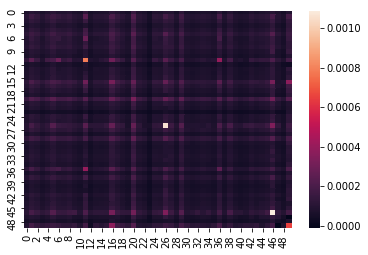

In [110]:
MTP2_component = B.T.dot(S_f).dot(B)
sns.heatmap(MTP2_component)
plt.show()

In [111]:
print("Proportion of entries that are negative in MTP2 component: ", np.sum(MTP2_component < 0)/MTP2_component.size)

Proportion of entries that are negative in MTP2 component:  0.0008


Heatmap of S_f


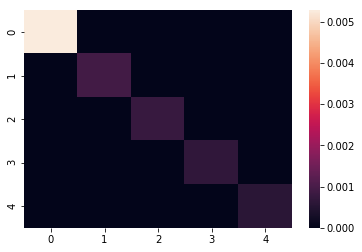

In [93]:
print("Heatmap of S_f")
sns.heatmap(S_f)
plt.show()

Heatmap of S_u


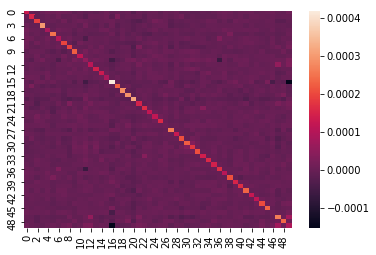

In [94]:
print("Heatmap of S_u")
sns.heatmap(S_u)
plt.show()

In [95]:
print("Proportion of entries that are negative in S_u: ", np.sum(S_u < 0)/S_u.size)

Proportion of entries that are negative in S_u:  0.6464
